✅ Dataset loaded successfully!
Shape: (103812, 8)
   time(s)    bvp       eda    hr       x       y       z  LABEL
0    10.00 -19.96  1.553661  52.0  25.375   4.750  59.250      0
1    10.25 -29.30  1.581831  52.0  25.500   5.000  58.625      0
2    10.50 -10.06  1.622807  52.0  24.125   3.875  59.500      0
3    10.75  -5.77  1.656099  52.0  28.000   0.250  61.875      0
4    11.00  37.60  1.680428  52.0  41.875  28.500  34.375      0 


 Training KNN Classifier...
 KNN Accuracy: 92.02%

 KNN Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     11114
           1       0.93      0.90      0.91      9330
           2       0.79      0.66      0.72       319

    accuracy                           0.92     20763
   macro avg       0.88      0.83      0.85     20763
weighted avg       0.92      0.92      0.92     20763



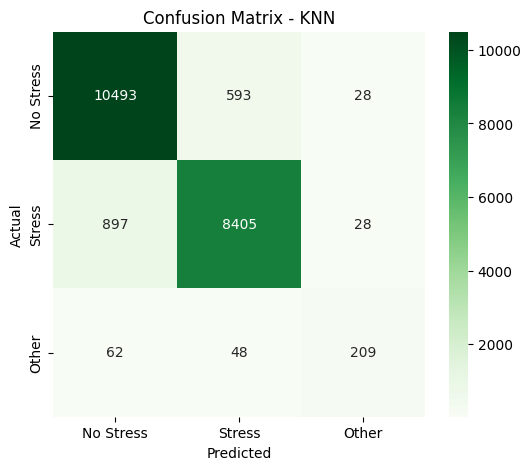


 Training Decision Tree Classifier...
 Decision Tree Accuracy: 77.91%

 Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81     11114
           1       0.80      0.69      0.74      9330
           2       0.55      0.81      0.65       319

    accuracy                           0.78     20763
   macro avg       0.71      0.78      0.73     20763
weighted avg       0.78      0.78      0.78     20763



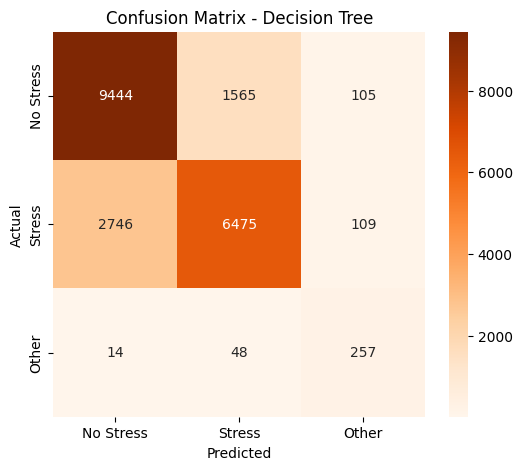

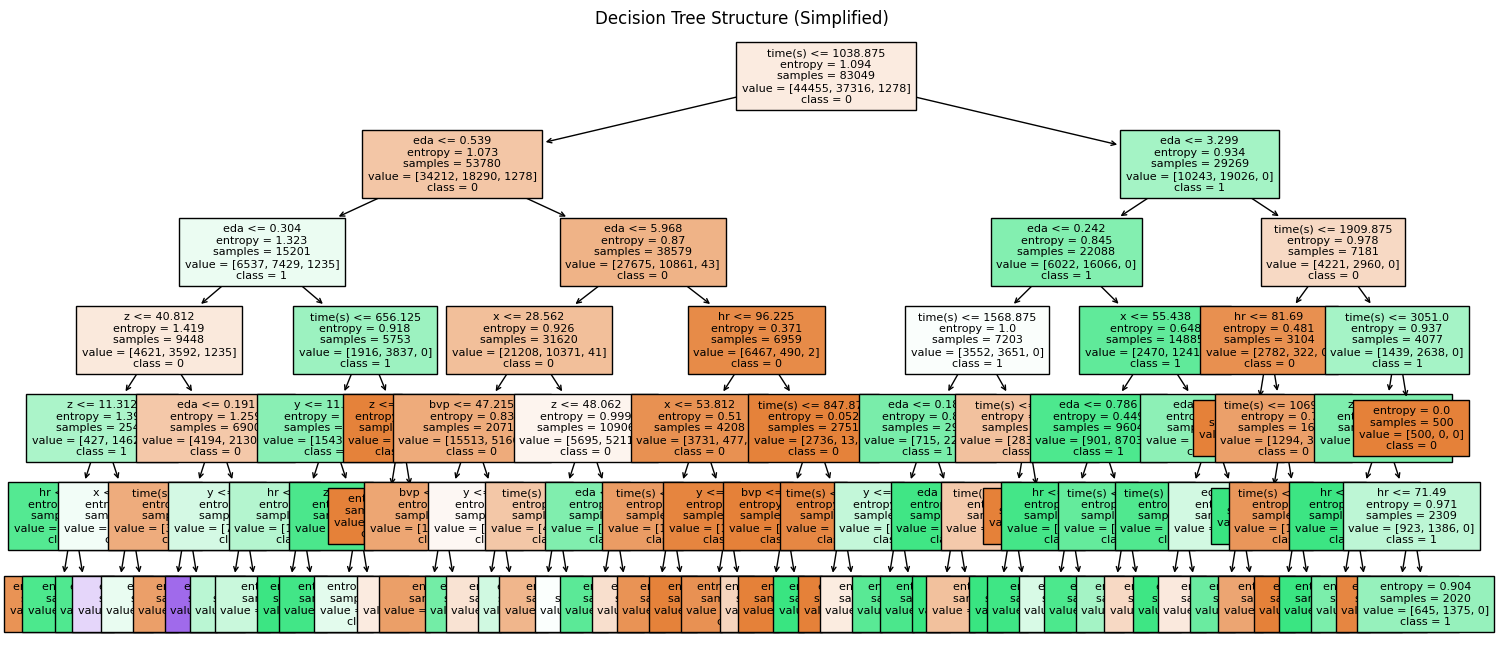


 Training Voting Ensemble (KNN + Decision Tree)...
 Voting Ensemble Accuracy: 83.70%

 Voting Ensemble Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.98      0.87     11114
           1       0.96      0.67      0.79      9330
           2       0.91      0.61      0.73       319

    accuracy                           0.84     20763
   macro avg       0.88      0.76      0.80     20763
weighted avg       0.86      0.84      0.83     20763



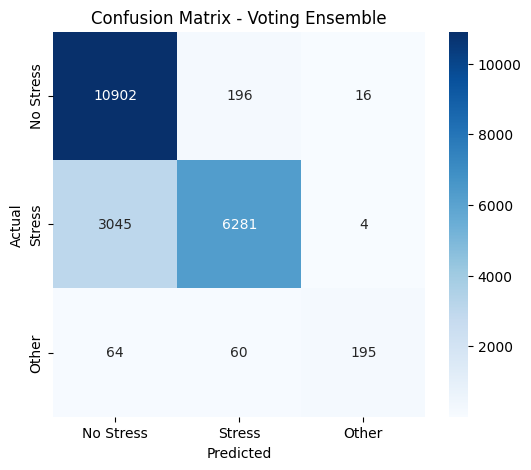


 Training AdaBoost with Decision Tree...
 AdaBoost Accuracy: 62.50%

 AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.49      0.59     11114
           1       0.56      0.77      0.65      9330
           2       0.94      0.95      0.95       319

    accuracy                           0.63     20763
   macro avg       0.74      0.74      0.73     20763
weighted avg       0.65      0.63      0.62     20763



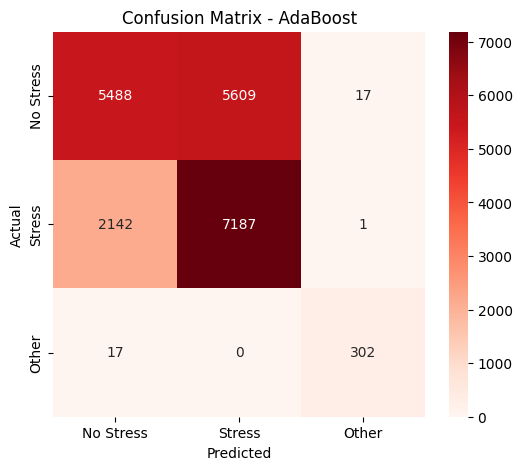

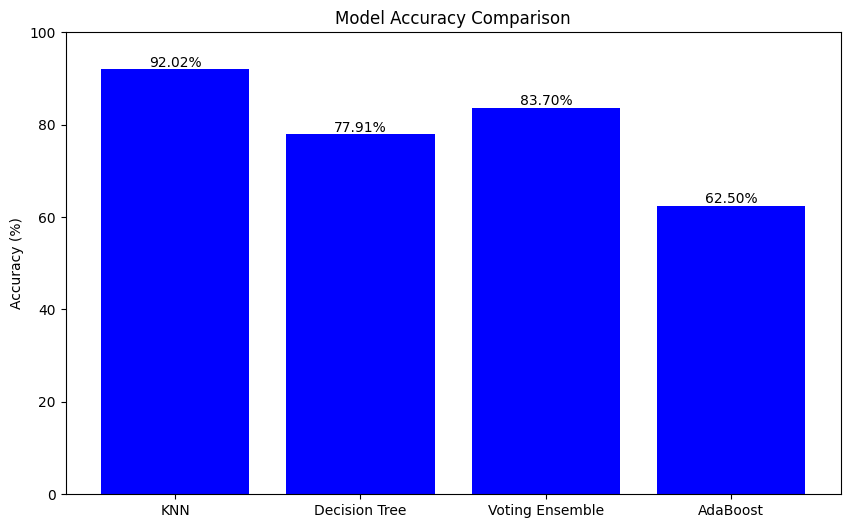


 Final Accuracy Summary:
 - KNN: 92.02%
 - Decision Tree: 77.91%
 - Voting Ensemble: 83.70%
 - AdaBoost: 62.50%


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("downsample.csv")
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head(), "\n")


if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

df = df.dropna()

target_col = 'LABEL'
X = df.drop(columns=[target_col])
y = df[target_col]



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# MODEL 1️: K-NEAREST NEIGHBORS

print("\n Training KNN Classifier...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

acc_knn = accuracy_score(y_test, y_pred_knn)
print(f" KNN Accuracy: {acc_knn*100:.2f}%\n")
print(" KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Stress','Stress', 'Other'], # Added 'Other' label
            yticklabels=['No Stress','Stress', 'Other']) # Added 'Other' label
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# MODEL 2️: DECISION TREE

print("\n Training Decision Tree Classifier...")
dt = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
print(f" Decision Tree Accuracy: {acc_dt*100:.2f}%\n")
print(" Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Stress','Stress', 'Other'], # Added 'Other' label
            yticklabels=['No Stress','Stress', 'Other']) # Added 'Other' label
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Dynamically generate class names based on unique values in y
unique_classes = sorted(y.unique())
class_names_dt = [str(cls) for cls in unique_classes] # Convert class names to strings

plt.figure(figsize=(18,8))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=class_names_dt, fontsize=8)
plt.title("Decision Tree Structure (Simplified)")
plt.show()

# MODEL 3️: Voting Ensemble (KNN + Decision Tree)

print("\n Training Voting Ensemble (KNN + Decision Tree)...")
voting_clf = VotingClassifier(
    estimators=[('knn', knn), ('dt', dt)],
    voting='hard'  # can change to 'soft' if probability-based
)
voting_clf.fit(X_train_scaled, y_train) # Using scaled data for KNN, non-scaled for DT
y_pred_voting = voting_clf.predict(X_test_scaled) # Predicting on scaled data

acc_voting = accuracy_score(y_test, y_pred_voting)
print(f" Voting Ensemble Accuracy: {acc_voting*100:.2f}%\n")
print(" Voting Ensemble Classification Report:\n", classification_report(y_test, y_pred_voting))

# Confusion matrix for Voting Ensemble
cm_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(6,5))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stress','Stress', 'Other'],
            yticklabels=['No Stress','Stress', 'Other'])
plt.title("Confusion Matrix - Voting Ensemble")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# MODEL 4️: AdaBoost with Decision Tree

print("\n Training AdaBoost with Decision Tree...")
ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3), # Corrected parameter name
    n_estimators=100,
    learning_rate=0.8,
    random_state=42
)
ada_clf.fit(X_train, y_train) # Using non-scaled data for Decision Tree base estimator
y_pred_ada = ada_clf.predict(X_test) # Predicting on non-scaled data

acc_ada = accuracy_score(y_test, y_pred_ada)
print(f" AdaBoost Accuracy: {acc_ada*100:.2f}%\n")
print(" AdaBoost Classification Report:\n", classification_report(y_test, y_pred_ada))

# Confusion matrix for AdaBoost
cm_ada = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(6,5))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Reds',
            xticklabels=['No Stress','Stress', 'Other'],
            yticklabels=['No Stress','Stress', 'Other'])
plt.title("Confusion Matrix - AdaBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# --------------------------
# Compare all accuracies
# --------------------------
models = {
    'KNN': acc_knn,
    'Decision Tree': acc_dt,
    'Voting Ensemble': acc_voting,
    'AdaBoost': acc_ada
}

results = models

plt.figure(figsize=(10,6))
plt.bar(results.keys(), [v*100 for v in results.values()], color=['blue'])
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
for i, (model, acc) in enumerate(results.items()):
    plt.text(i, acc*100 + 0.5, f"{acc*100:.2f}%", ha='center')
plt.ylim(0, 100)
plt.show()

# Print summary
print("\n Final Accuracy Summary:")
for model, acc in results.items():
    print(f" - {model}: {acc*100:.2f}%")

In [2]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Using weighted average (best for multi-class problems)
precision_scores = {
    'KNN': precision_score(y_test, y_pred_knn, average='weighted'),
    'Decision Tree': precision_score(y_test, y_pred_dt, average='weighted'),
    'Voting Ensemble': precision_score(y_test, y_pred_voting, average='weighted'),
    'AdaBoost': precision_score(y_test, y_pred_ada, average='weighted')
}

recall_scores = {
    'KNN': recall_score(y_test, y_pred_knn, average='weighted'),
    'Decision Tree': recall_score(y_test, y_pred_dt, average='weighted'),
    'Voting Ensemble': recall_score(y_test, y_pred_voting, average='weighted'),
    'AdaBoost': recall_score(y_test, y_pred_ada, average='weighted')
}

f1_scores = {
    'KNN': f1_score(y_test, y_pred_knn, average='weighted'),
    'Decision Tree': f1_score(y_test, y_pred_dt, average='weighted'),
    'Voting Ensemble': f1_score(y_test, y_pred_voting, average='weighted'),
    'AdaBoost': f1_score(y_test, y_pred_ada, average='weighted')
}


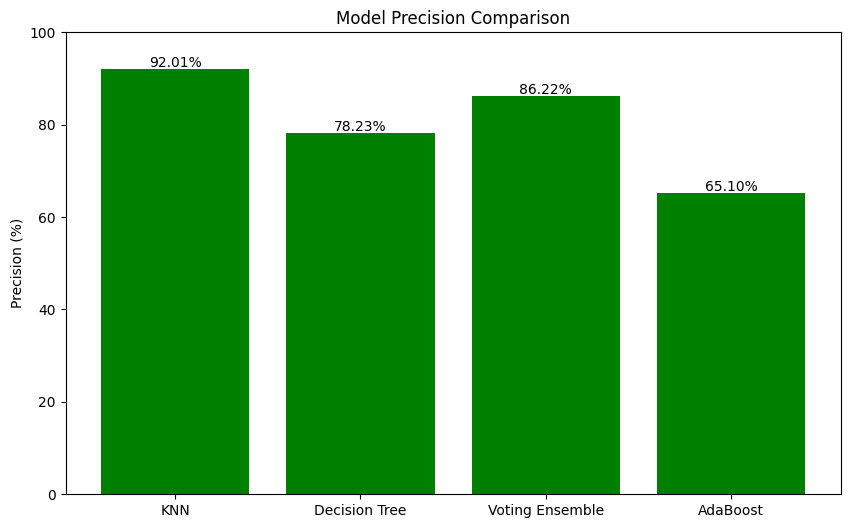

In [3]:
plt.figure(figsize=(10,6))
plt.bar(precision_scores.keys(), [v*100 for v in precision_scores.values()], color='green')
plt.ylabel("Precision (%)")
plt.title("Model Precision Comparison")

for i, (model, val) in enumerate(precision_scores.items()):
    plt.text(i, val*100 + 0.5, f"{val*100:.2f}%", ha='center')

plt.ylim(0,100)
plt.show()


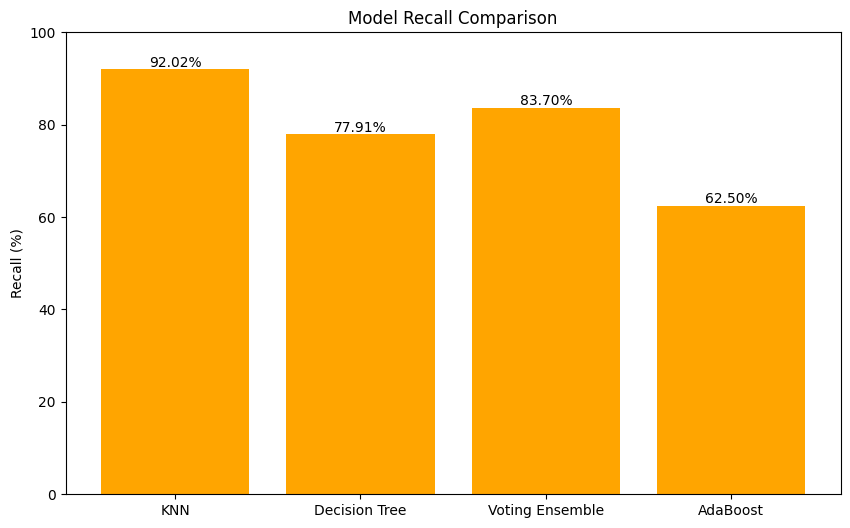

In [4]:
plt.figure(figsize=(10,6))
plt.bar(recall_scores.keys(), [v*100 for v in recall_scores.values()], color='orange')
plt.ylabel("Recall (%)")
plt.title("Model Recall Comparison")

for i, (model, val) in enumerate(recall_scores.items()):
    plt.text(i, val*100 + 0.5, f"{val*100:.2f}%", ha='center')

plt.ylim(0,100)
plt.show()



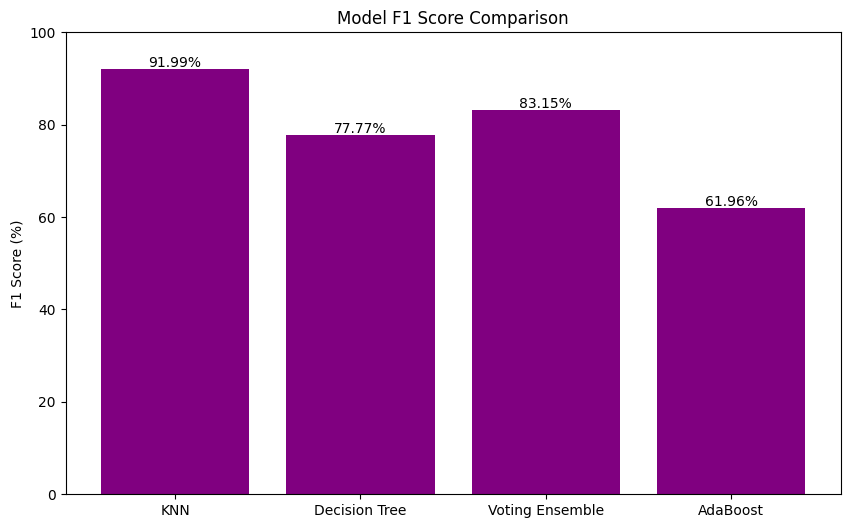

In [5]:
plt.figure(figsize=(10,6))
plt.bar(f1_scores.keys(), [v*100 for v in f1_scores.values()], color='purple')
plt.ylabel("F1 Score (%)")
plt.title("Model F1 Score Comparison")

for i, (model, val) in enumerate(f1_scores.items()):
    plt.text(i, val*100 + 0.5, f"{val*100:.2f}%", ha='center')

plt.ylim(0,100)
plt.show()


In [6]:
print("Feature Columns:\n", X.columns)


Feature Columns:
 Index(['time(s)', 'bvp', 'eda', 'hr', 'x', 'y', 'z'], dtype='object')


In [7]:
# ==========================
# USER INPUT PREDICTION
# ==========================

print("\n Enter values to predict Stress Level")

user_data = []

for col in X.columns:
    value = float(input(f"Enter value for {col}: "))
    user_data.append(value)

# Convert to DataFrame
user_df = pd.DataFrame([user_data], columns=X.columns)

# Scale the input (IMPORTANT)
user_scaled = scaler.transform(user_df)

# Choose best model (example: AdaBoost)
final_model = ada_clf   # you can change to knn, dt, voting_clf

# Predict
prediction = final_model.predict(user_df)[0]

# If using KNN or Voting → use scaled data
# prediction = knn.predict(user_scaled)[0]

print("\n Predicted Stress Level:", prediction)

# Optional: Convert numeric label to text
label_map = {
    0: "No Stress",
    1: "Stress",
    2: "Other"
}

if prediction in label_map:
    print(" Meaning:", label_map[prediction])



 Enter values to predict Stress Level


Enter value for time(s):  10
Enter value for bvp:  2
Enter value for eda:  2
Enter value for hr:  2
Enter value for x:  2
Enter value for y:  2
Enter value for z:  2



 Predicted Stress Level: 1
 Meaning: Stress


In [9]:
from sklearn.pipeline import Pipeline
import joblib
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

pipeline.fit(X_train, y_train)

joblib.dump(pipeline, "model.pkl")


['model.pkl']